# Hiring Demographics

An analysis of gendered hiring patterns. Look at the average time between getting a PhD and getting hired into a faculty position. 

**Hypothesis**: Given the smaller number of women, and the push toward diversity, are women hired more quickly than men?


**Sample**: Use the listings on the Astrophysics Rumor Mill as a representative sample of people that have been hired over the past few years. Exclusively use rumors with confirmed names. While this an incomplete list of people hired over the past few years, it is likely representative. Use 2010-2011 through 2015-2016 years. Google PhD year for each person on the list (usually listed in a CV, or on the faculty webpage. For the year that the person was hired, use the latter year of the rumor mill (ie. for names on the 2010-2011, the year hired is 2011). Do not consider when they actually started the faculty job; the focus is on the hiring process, and in that case the year someone was hired is more important. 

When googling for the PhD year, record the gender of the astronomer. This assumes a binary gender, and evaluates gender strictly based on how they present in an available photo. This marginalizes non-binary gender individuals... It is a simplifying assumption.


I exclude people who got a PhD before 2000. Most of the people in this range previously worked at a national lab (e.g. JPL) before being hired into a faculty position. Given the hypothesis, this is a reasonable assumption.

This leaves a total sample size of 215 people, 137 men, 78 women.

 
Mean time to hiring: 4.91+-0.33


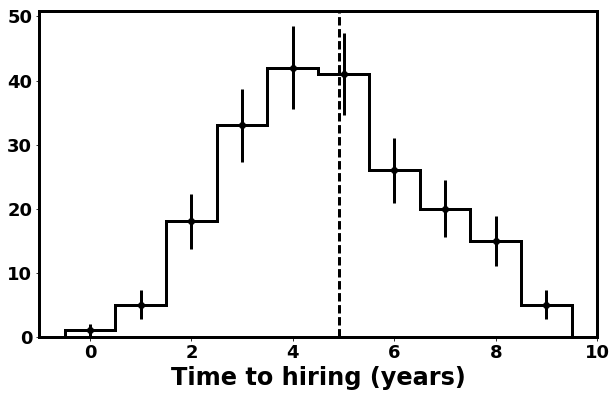

In [1]:
%run plot_demo
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
plot_demo(full=True)

Over the entire distribution, the mean time to hiring is 4.91$\pm$0.33

 
Time to faculty, Men: 5.32+-0.45
Time to faculty, Female: 4.19+-0.47 
Prob: 0.035


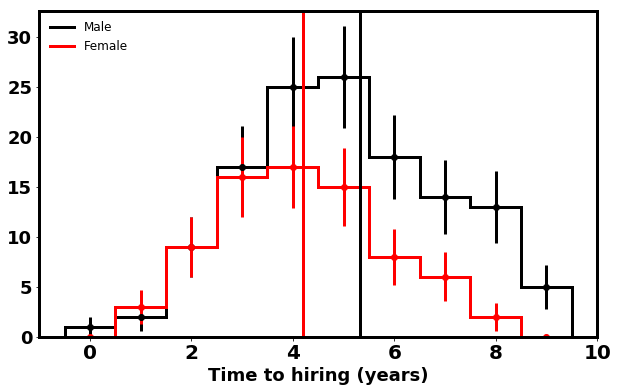

In [2]:
plot_demo()

There is a significant difference in the gendered distributions. Women are hired on average 4.19$\pm$0.47 years out of graduate school, while men are hired on average 5.32$\pm$0.45 years out of grad school. A KS test indicates a significant difference in these distribution at p<0.05 (p=0.035). 

## Models:

There are multiple possible explanations for why the genedered distributions could differ. We examine each in turn, using a similar basic framework. We generate a labor pool, filled with 50,000 people per year, a fraction of which ($ffrac$) are women. In the fiducial model $ffrac=0.3$, but we consider variations on this fraction in some of the models. The labor pool is populated starting in 2000 and ending in 2016. The year in which someone enters the labor pool is recorded as the year in which they received their PhD.

Once the labor pool is defined, people are randomly selected from this labor pool to define the pool of people that are hired in to faculty jobs. Starting in 2011 and going through 2016, 30,000 people are hired from the labor pool. Once a person is hired in a given year they are removed from the labor pool so that they are not hired in subsequent years. 

In order to match the observed distribution the likelihood for being hired needs to vary depending on how long someone has been out of graduate school. A smaller fraction of astronomers are hired immediately after graduating, and after being on the labor market for 8 year, than those on the labor market for 5 years. This may be due to a number of factors, including a preference to hire astronomers a few years out of graduate school, and people that have been on the labor market for many years leaving the labor pool. We don't distinguish between these two scenarios for basic model. When looking at gendered differences, we consider differences in the rate at which astronomers leave the labor pool.

In our models, we allow the probability of being hired as a function of number of years after graduate school as free parameter. We also exclude anyone that has been on the labor market for more than 10 years (to match our selection effect on the observed sample).

Our basic model is shown below

 
Mean time to hiring: 4.91+-0.33
 
Mean time to hiring (model): 4.72


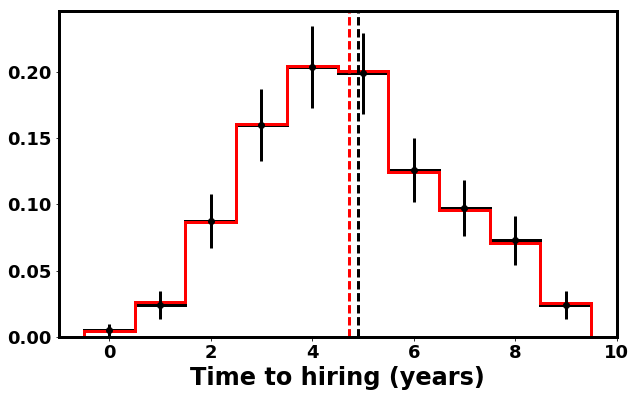

In [3]:
basic_model(success=[.01,.06,.2,.4,.56,.60,.4,.3,.21,.07])

 
Mean time to hiring: 5.32+-0.45
 
Mean time to hiring (model): 4.98


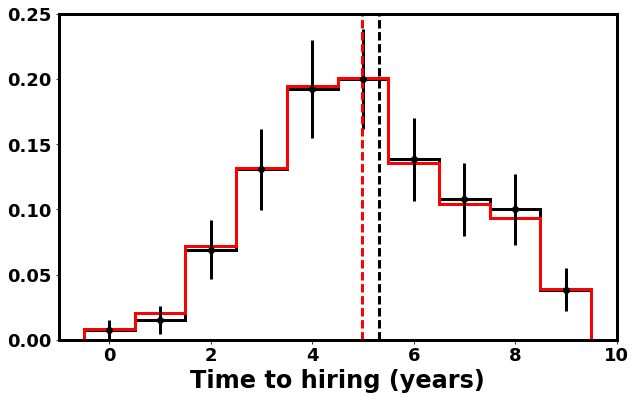

In [4]:
basic_model(success=[.02,.05,.18,.35,.56,.65,.46,.35,.31,.12],male_only=True)

 
Mean time to hiring: 4.19+-0.47
 
Mean time to hiring (model): 4.13


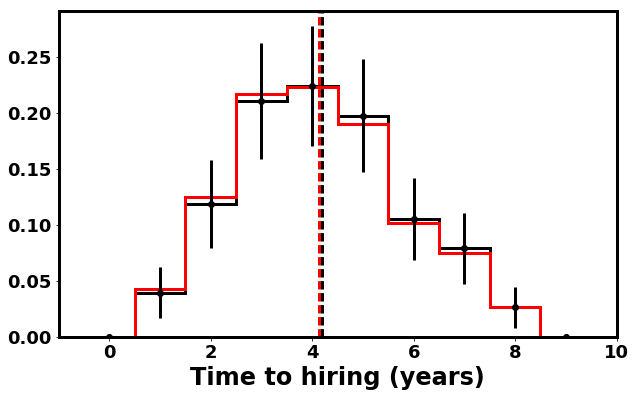

In [5]:
basic_model(success=[.00,.1,.3,.58,.67,.63,.34,.24,.08,.00],female_only=True)

## Model 1: Changing Demographics 

The fraction of women within the field has increased over time. This can cause the hiring time distribution to be biased towards shorter times for women than for men. To model this we implement a linear change in the fraction of women with time, starting in 2000. This is specified by the *slope* keyword.

%Female 2003 grad students (30pm2%): 0.56
%Female Assistant Prof 2013 (26pm4%): 0.59


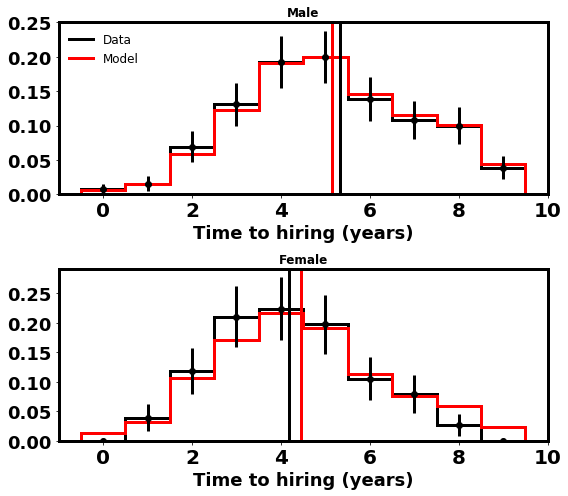

In [7]:
plt.rcParams['figure.figsize']=(8,7)
gendered_model1([.03,.07,.24,.43,.63,.61,.40,.28,.23,.09],slope=.04)
plt.tight_layout()

Our best fit comes with slope of 0.04. This implies an increase in the fraction of women obtaining PhDs in astronomy of 4 percentage points per year. This is demonstrably False, because it implies that in 2017 only 5% of PhDs in astronomy are obtained by men, which is inconsistent with measured demographics.

We can attempt a more realistic slope of .005. The results of this model (shown below) demonstrate that the change in gender demographics has little effect on the overall distribution.

%Female 2003 grad students (30pm2%): 0.33
%Female Assistant Prof 2013 (26pm4%): 0.33


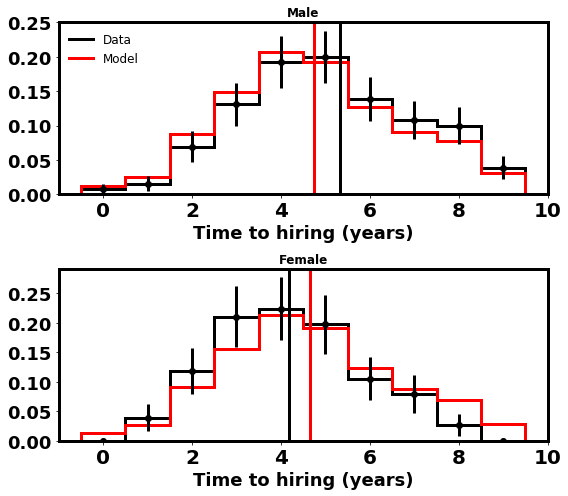

In [8]:
gendered_model1([.03,.07,.24,.43,.63,.61,.40,.28,.23,.09],slope=.005)
plt.tight_layout()

## Model 2: Hiring Bias

Our second model considers an intrinsic bias towards hiring women. This may occur as a result of diversity efforts leading more universities to hire women more quickly out of graduate school, or because women are intrinsically better qualified for faculty jobs and therefore are more successful on the job market. Given the finite number of women that receive a PhD each year, by removing women from the labor pool early on there are fewer women at later times, depressing this end of the distribution.
    
We model this by including a *bias* parameter that is the increase in the probability of hiring a women relative to hiring a man. 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.87


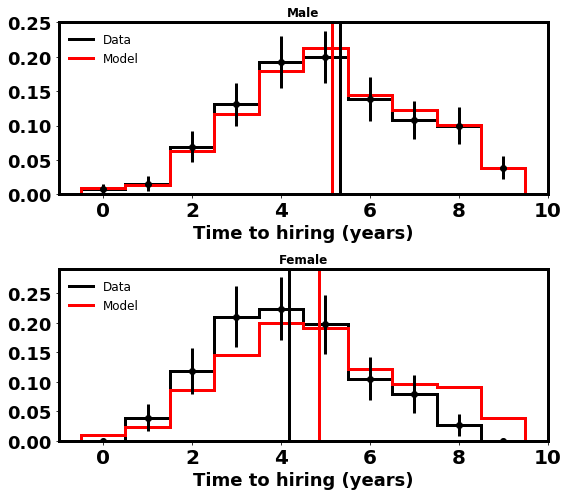

In [10]:
gendered_model2([.02,.05,.18,.35,.56,.65,.46,.35,.31,.12],bias=20)
plt.tight_layout()

As demonstrated above, even an extreme bias (20x higher probability of hiring a women than hiring a man) does not produce a distribution that matches the observed hiring distribution for women. It also strongly over-estimates the fraction of women among assistant professors. This is because there are enough women in the labor pool such that the labor pool does not become starved at later times.

While the number of astronomers that enter the labor pool each year (30,000) and the number that are hired (10,000) is much, much larger than the actual statistics, the relative proportion is realistic. According to the AIP, ~150 astronomers received PhDs in 200?, while there are typically ~50 faculty job postings per year. By maintaining the proportion, but vastly increasing the number of people in the labor pool, we can accuratly characterize the model distribution with small sampling errors. 

## Model 3: Leaving the Labor Pool

The third model we consider is one in which astronomers leave the labor pool at a rate that increases with time. The probability of leaving is specified by an exponential with a characteristic timescale *$\tau$*. The timescale can differ between men and women, with a smaller timescale implying that a demographic leaves the field at a faster rate. This exponential taper is applied starting 2 years after obtaining a PhD.

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.23


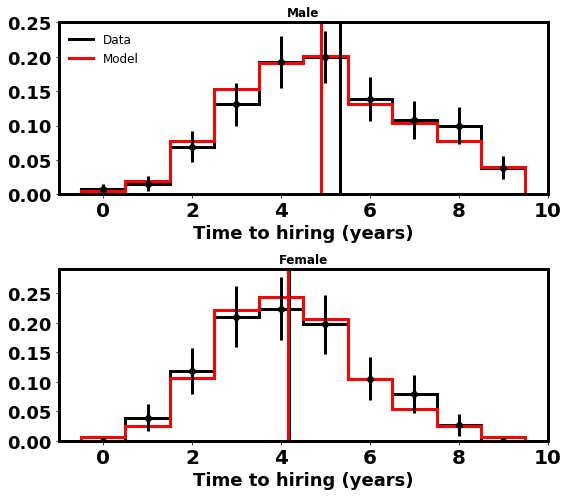

In [11]:
gendered_model3([.01,.04,.16,.32,.48,.64,.6,.75,1.,1.],tau_male=10.,tau_female=5.)
plt.tight_layout()

This model is able to successfully match both the male and female distribution with time. Thus the relative distributions for men and women is consistent with women leaving the field more quickly than men (a result that isn't too surprising...). This model also matches the survival demographics of Hughes et al.